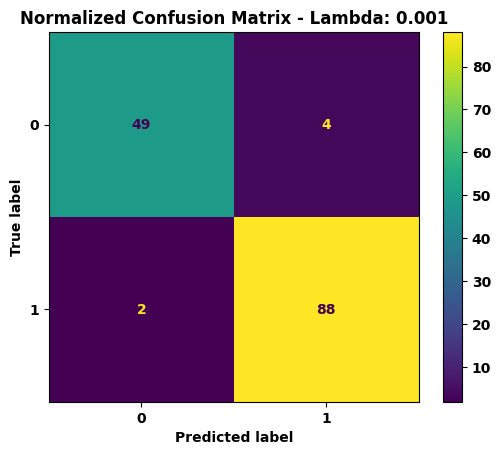

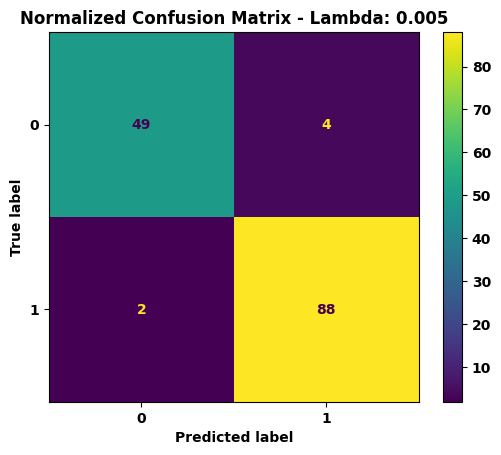

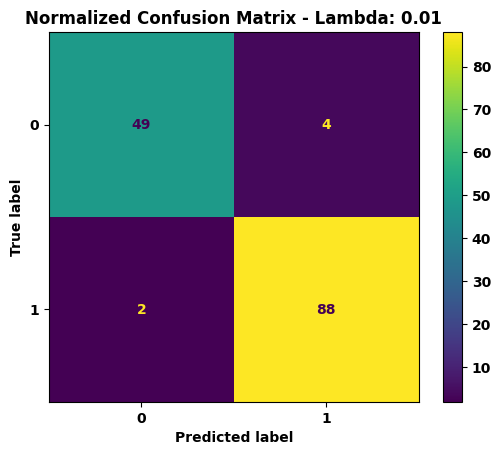

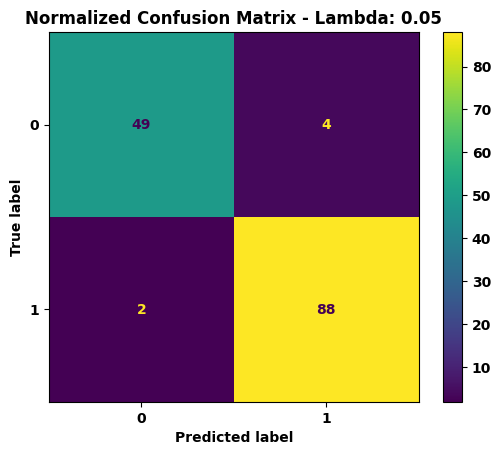

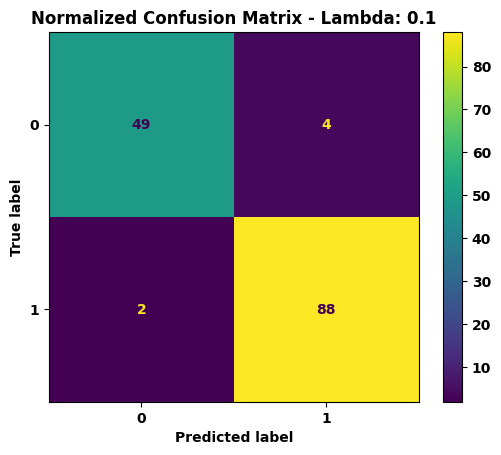

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, lambda_val=3000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_val = lambda_val  # Regularization parameter

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n + 1)  # Initialize weights with zeros, including bias term
        X = np.hstack((np.ones((m, 1)), X))  # Add bias term to the input features

        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            predictions = sigmoid(z)
            error = predictions - y
            gradient = (np.dot(X.T, error) + self.lambda_val * np.concatenate(([0], self.theta[1:]))) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
        probabilities = sigmoid(np.dot(X, self.theta))
        return (probabilities >= 0.5).astype(int)

# Load the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of lambda values
lambda_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Creating a DataFrame to store the results
results_df_custom_logreg = pd.DataFrame()

for  i,lambda_val in enumerate(lambda_values):
    # Logistic Regression
    custom_logreg = LogisticRegression(lambda_val=lambda_val)
    custom_logreg.fit(X_train, y_train)
    pred = custom_logreg.predict(X_test)
    pred_train = custom_logreg.predict(X_train)
    # Test set accuracy
    train_accuracy = np.mean( pred_train == y_train)
    test_accuracy = np.mean(pred == y_test)
   

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Normalized Confusion Matrix - Lambda: {}'.format(lambda_val))
    plt.show()

    # Append the results to the DataFrame
    results_df_custom_logreg = pd.concat([results_df_custom_logreg, pd.DataFrame({'Lambda': [lambda_val], 'Iteration': [i + 1], 'Train Accuracy':train_accuracy , 'Test Accuracy': [test_accuracy]})], ignore_index=True)



In [29]:
from IPython.display import display
pd.set_option('display.max_rows', None)
display(results_df_custom_logreg)

,Lambda,Iteration,Train Accuracy,Test Accuracy
0,0.001,1,0.981221,0.958042
1,0.005,2,0.981221,0.958042
2,0.010,3,0.981221,0.958042
3,0.050,4,0.981221,0.958042
4,0.100,5,0.981221,0.958042


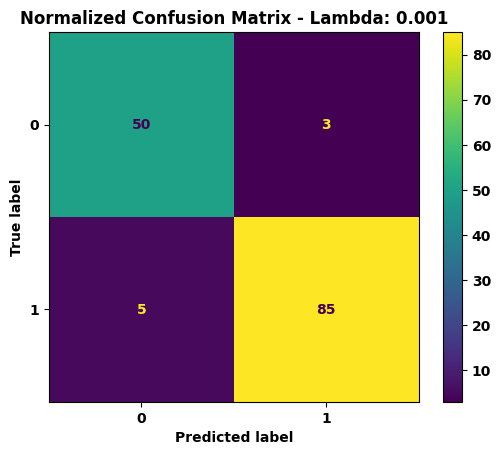

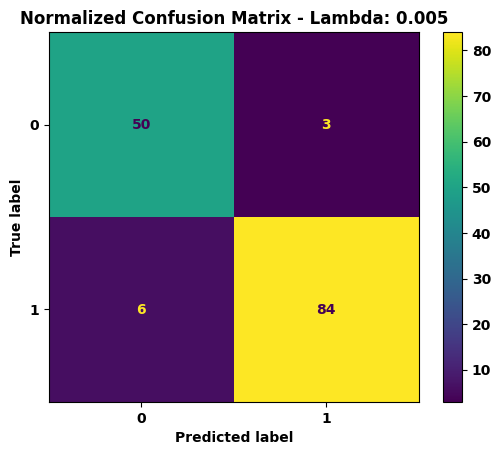

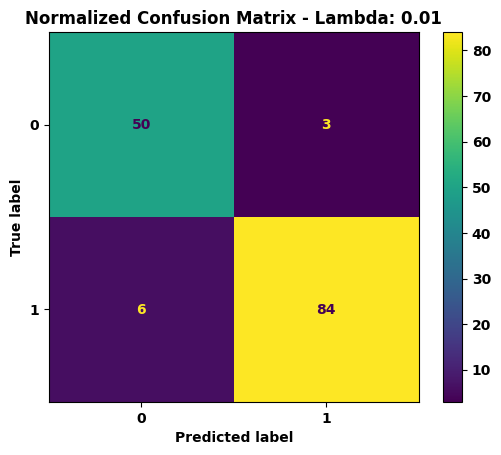

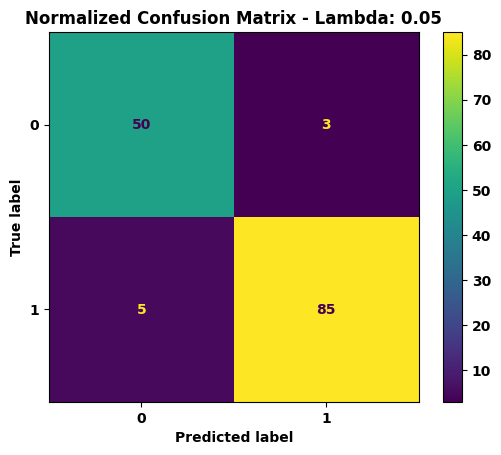

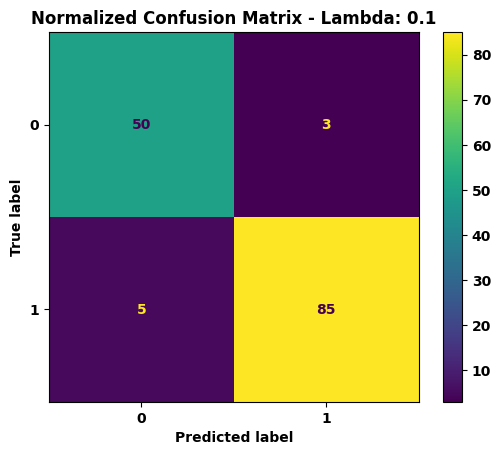

In [33]:

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
cancer = load_breast_cancer()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining regularization parameters (lambda values)
lambda_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Create a DataFrame to store the results
results_df_logreg = pd.DataFrame()

# Training the Logistic Regression model for different values of lambda
for i,lam in enumerate(lambda_values):
    logreg = LogisticRegression(solver='lbfgs', C=1/lam,tol=0.001,max_iter=1000)  # Inverse of lambda is used as C in Logistic Regression
    
    # Cross-validation on the training set
    cv_scores = cross_val_score(logreg, X_train, y_train, cv=10)
    train_accuracy = np.mean(cv_scores)
    
    # Training the model on the entire training set
    logreg.fit(X_train, y_train)
    
    # Test set accuracy
    test_accuracy = logreg.score(X_test, y_test)
    
    # Append the results to the DataFrame
    results_df_logreg = pd.concat([results_df_logreg, pd.DataFrame({'Lambda': [lam], 'Iteration': [i + 1], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})], ignore_index=True)

    # Confusion Matrix
    cm = confusion_matrix(y_test, logreg.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Normalized Confusion Matrix - Lambda: {}'.format(lam))
    plt.show()





In [34]:
from IPython.display import display
pd.set_option('display.max_rows', None)
display(results_df_logreg)


,Lambda,Iteration,Train Accuracy,Test Accuracy
0,0.001,1,0.957973,0.944056
1,0.005,2,0.960354,0.937063
2,0.010,3,0.962680,0.937063
3,0.050,4,0.967386,0.944056
4,0.100,5,0.969712,0.944056
